```yaml
---
title: "Example on how to apply TextImage Augmentation"
description: "An example of using Albumentations to add text to an image, featuring Mooze and Meeko"
image: "images/cats.jpg"
---
```

# Example on how to write on top of images

Note:
- Code for the transform is based on the code from [https://github.com/danaaubakirova/doc-augmentation](https://github.com/danaaubakirova/doc-augmentation) by [Dana Aubakirova](https://www.linkedin.com/in/dana-aubakirova-3220981ab/) 
- Many thanks to Sarah Bieszczad for letting us feature her cats Mooze (small one) and Meeko (the giant) in our project


**Important!**

As input this transform takes bounding boxes in the Albumentations format, which normalized Pascal VOC. I.e.

`bbox = [x_min / width, y_min / height, x_max / width, y_max, height]`

For this transform to work we need to install optional dependency `pillow`

In [ ]:
from __future__ import annotations

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install -U pillow

In [ ]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

/opt/homebrew/Caskroom/miniconda/base/envs/albumentations_examples/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 5))
    plt.axis("off")
    plt.imshow(image)

In [ ]:
image = cv2.imread("images/cats.jpg", cv2.IMREAD_COLOR_RGB)

In [ ]:
font_path = "../data/documents/LiberationSerif-Regular.ttf"

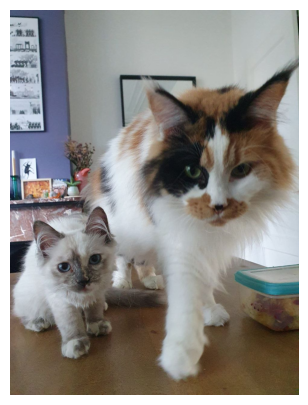

In [ ]:
visualize(image)

## Write text

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="yellow")])

In [ ]:
metadata = {
    "bbox": [0.15, 0.9, 0.9, 0.98],
    "text": "Mooze and Meeko",
}

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

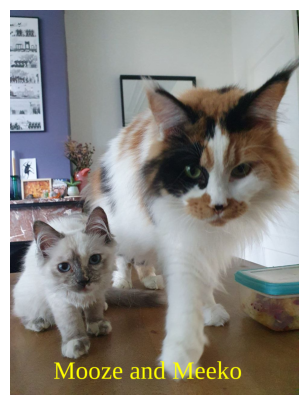

In [ ]:
visualize(transformed["image"])

## Inpaint background
We black out parts of the image where insert text and inpaint them. Could be useful when replacing old text with a new one.

In [ ]:
transform = A.Compose(
    [A.TextImage(font_path=font_path, p=1, font_color=(255, 0, 0), clear_bg=True)],
    strict=True,
    seed=137,
)

In [ ]:
metadata = {
    "bbox": [0.1, 0.3, 0.9, 0.38],
    "text": "Dangerous Tigers",
}

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

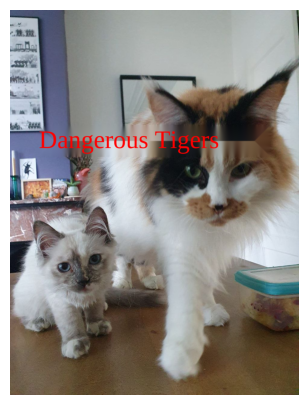

In [ ]:
visualize(transformed["image"])

## Write several lines

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="black", clear_bg=True)])

In [ ]:
metadata = [
    {
        "bbox": [0.02, 0.1, 0.95, 0.17],
        "text": "Big dreams in small packages...",
    },
    {"bbox": [0.02, 0.85, 0.95, 0.91], "text": "...and even bigger in bigger ones."},
]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

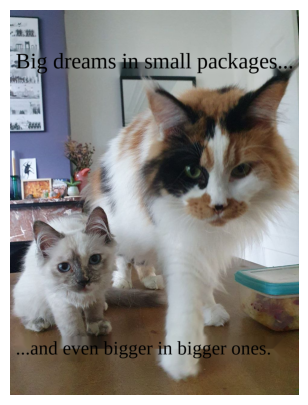

In [ ]:
visualize(transformed["image"])

## Augment text

We can insert text as is, or augment it on the fly.

### Swap words

In [ ]:
transform = A.Compose(
    [A.TextImage(font_path=font_path, p=1, font_color="white", augmentations=["swap"])],
    strict=True,
    seed=137,
)

In [ ]:
metadata = [
    {
        "bbox": [0.02, 0.1, 0.95, 0.16],
        "text": "Big dreams in small packages...",
    },
    {"bbox": [0.02, 0.85, 0.95, 0.91], "text": "...and even bigger in bigger ones."},
]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

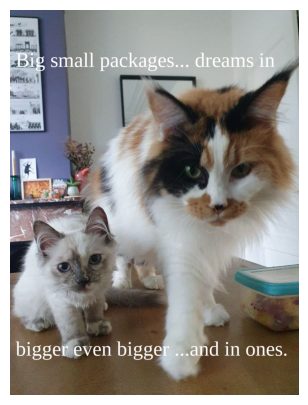

In [ ]:
visualize(transformed["image"])

### Random Deletion

In [ ]:
transform = A.Compose(
    [A.TextImage(font_path=font_path, p=1, font_color="red", augmentations=["deletion"])],
    strict=True,
    seed=137,
)

In [ ]:
metadata = [
    {
        "bbox": [0.02, 0.1, 0.95, 0.16],
        "text": "Growing up with a giant...",
    },
    {"bbox": [0.02, 0.85, 0.95, 0.91], "text": "...is always an adventure.."},
]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

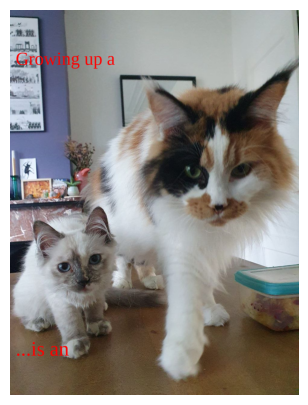

In [ ]:
visualize(transformed["image"])

### Insert random stopwords

In [ ]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.3 MB/s eta 0:00:00


In [ ]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladimiriglovikov/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stops = stopwords.words("english")

In [ ]:
transform = A.Compose(
    [A.TextImage(font_path=font_path, p=1, font_color="white", augmentations=["insertion"], stopwords=stops)],
    strict=True,
    seed=137,
)

In [ ]:
metadata = {
    "bbox": [0.15, 0.9, 0.9, 0.95],
    "text": "Mooze and Meeko",
}

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

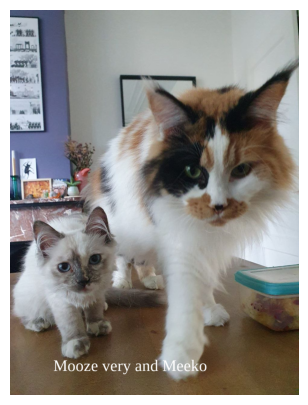

In [ ]:
visualize(transformed["image"])

## Returning augmented text

If you need text that was added to the image after "swap", "insertion" or "deletion" you may get it with: 

In [ ]:
transform = A.Compose(
    [A.TextImage(font_path=font_path, p=1, font_color="white", augmentations=["insertion", "swap"], stopwords=stops)],
    strict=True,
    seed=137,
)

In [ ]:
metadata = [
    {
        "bbox": [0.02, 0.1, 0.95, 0.16],
        "text": "Big dreams in small packages...",
    },
    {"bbox": [0.02, 0.85, 0.95, 0.91], "text": "...and even bigger in bigger ones."},
]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

In [ ]:
transformed["overlay_data"]

[{'bbox_coords': (19, 1088, 912, 1164),
  'text': 'where ...and even bigger down in bigger ones. before',
  'original_text': '...and even bigger in bigger ones.',
  'bbox_index': 1,
  'font_color': 'white'},
 {'bbox_coords': (19, 128, 912, 204),
  'text': 'Big small packages... dreams in',
  'original_text': 'Big dreams in small packages...',
  'bbox_index': 0,
  'font_color': 'white'}]